In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# df = pd.read_json('data/review.json', lines=True)

In [2]:
df2 = pd.read_pickle('data/data_frames/Cell_Phones_and_Accessories_5.pkl')

In [22]:
item_df = (df2['asin']).value_counts()
many_reviews = item_df[item_df > 20].index.values
print (many_reviews)

['B007P5NHJO']


Plot helpfulness vs deviation plots for individual items. Considering only items with ore than 100 reviews.

B007P5NHJO
105
Average Rating = 4.523809523809524
Standard Deviation = 0.9571310115353231


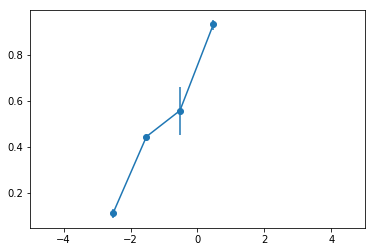

In [23]:
for i in many_reviews:
    X = []
    y = []
    item = df2.loc[df2['asin'] == i]
    print (i)
    print (item.size)
    average_rating = np.mean(item['overall'])
    print ("Average Rating =", average_rating)
    print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X.append(row['overall'] - average_rating)
    df_temp = pd.DataFrame({'y': y, 'X': X})
    uni_x = df_temp['X'].unique()
    y2 = []
    e = []
    e_lower = []
    for uni in uni_x:
        y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
        e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
        e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
    plt.xlim(-5, 5)
    plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
    plt.show(plot3)

In [24]:
many_reviews2 = item_df[item_df > 20].index.values
low_sd_items = []
for i in many_reviews2:
    item = df2.loc[df2['asin'] == i]
    sd = np.std(item['overall'])
    if (sd < 1):
        low_sd_items.append(i)
        print ("Standard Deviation =", sd)
    

Standard Deviation = 0.9571310115353231


In [25]:
low_sd_items

['B007P5NHJO']

B007P5NHJO
21
Average Rating = 4.523809523809524
Standard Deviation = 0.9571310115353231


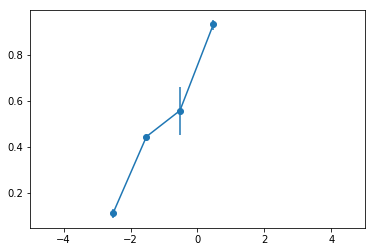

In [26]:
for i in low_sd_items:
    X = []
    y = []
    item = df2.loc[df2['asin'] == i]
    print (i)
    print (item.size//5)
    average_rating = np.mean(item['overall'])
    print ("Average Rating =", average_rating)
    print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X.append(row['overall'] - average_rating)
    df_temp = pd.DataFrame({'y': y, 'X': X})
    uni_x = df_temp['X'].unique()
    y2 = []
    e = []
    e_lower = []
    for uni in uni_x:
        y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
        e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
        e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))

    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
    plt.xlim(-5, 5)
    plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
    plt.show(plot3)

In [ ]:
# how can computed star average be equal to ineger every time.